In [1]:
import SimpSOM as sps
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv("Admission_Predict.csv")
dados.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
## adicionando em um array
X = dados.iloc[:, 1:8].values
X

### Criando uma rede 20x20 e ativando o Periodic Boundary Conditions (PBC).

In [4]:
net = sps.somNet(20, 20, X, PBC=True)

Periodic Boundary Conditions active.
The weights will be initialised randomly.


### Treinando a rede por 10000 épocas e com taxa de aprendizado inicial de 0,01

In [5]:
net.train(0.01, 10000)

Training SOM... done!    


In [6]:
net.save('Admission_Predict_weights')

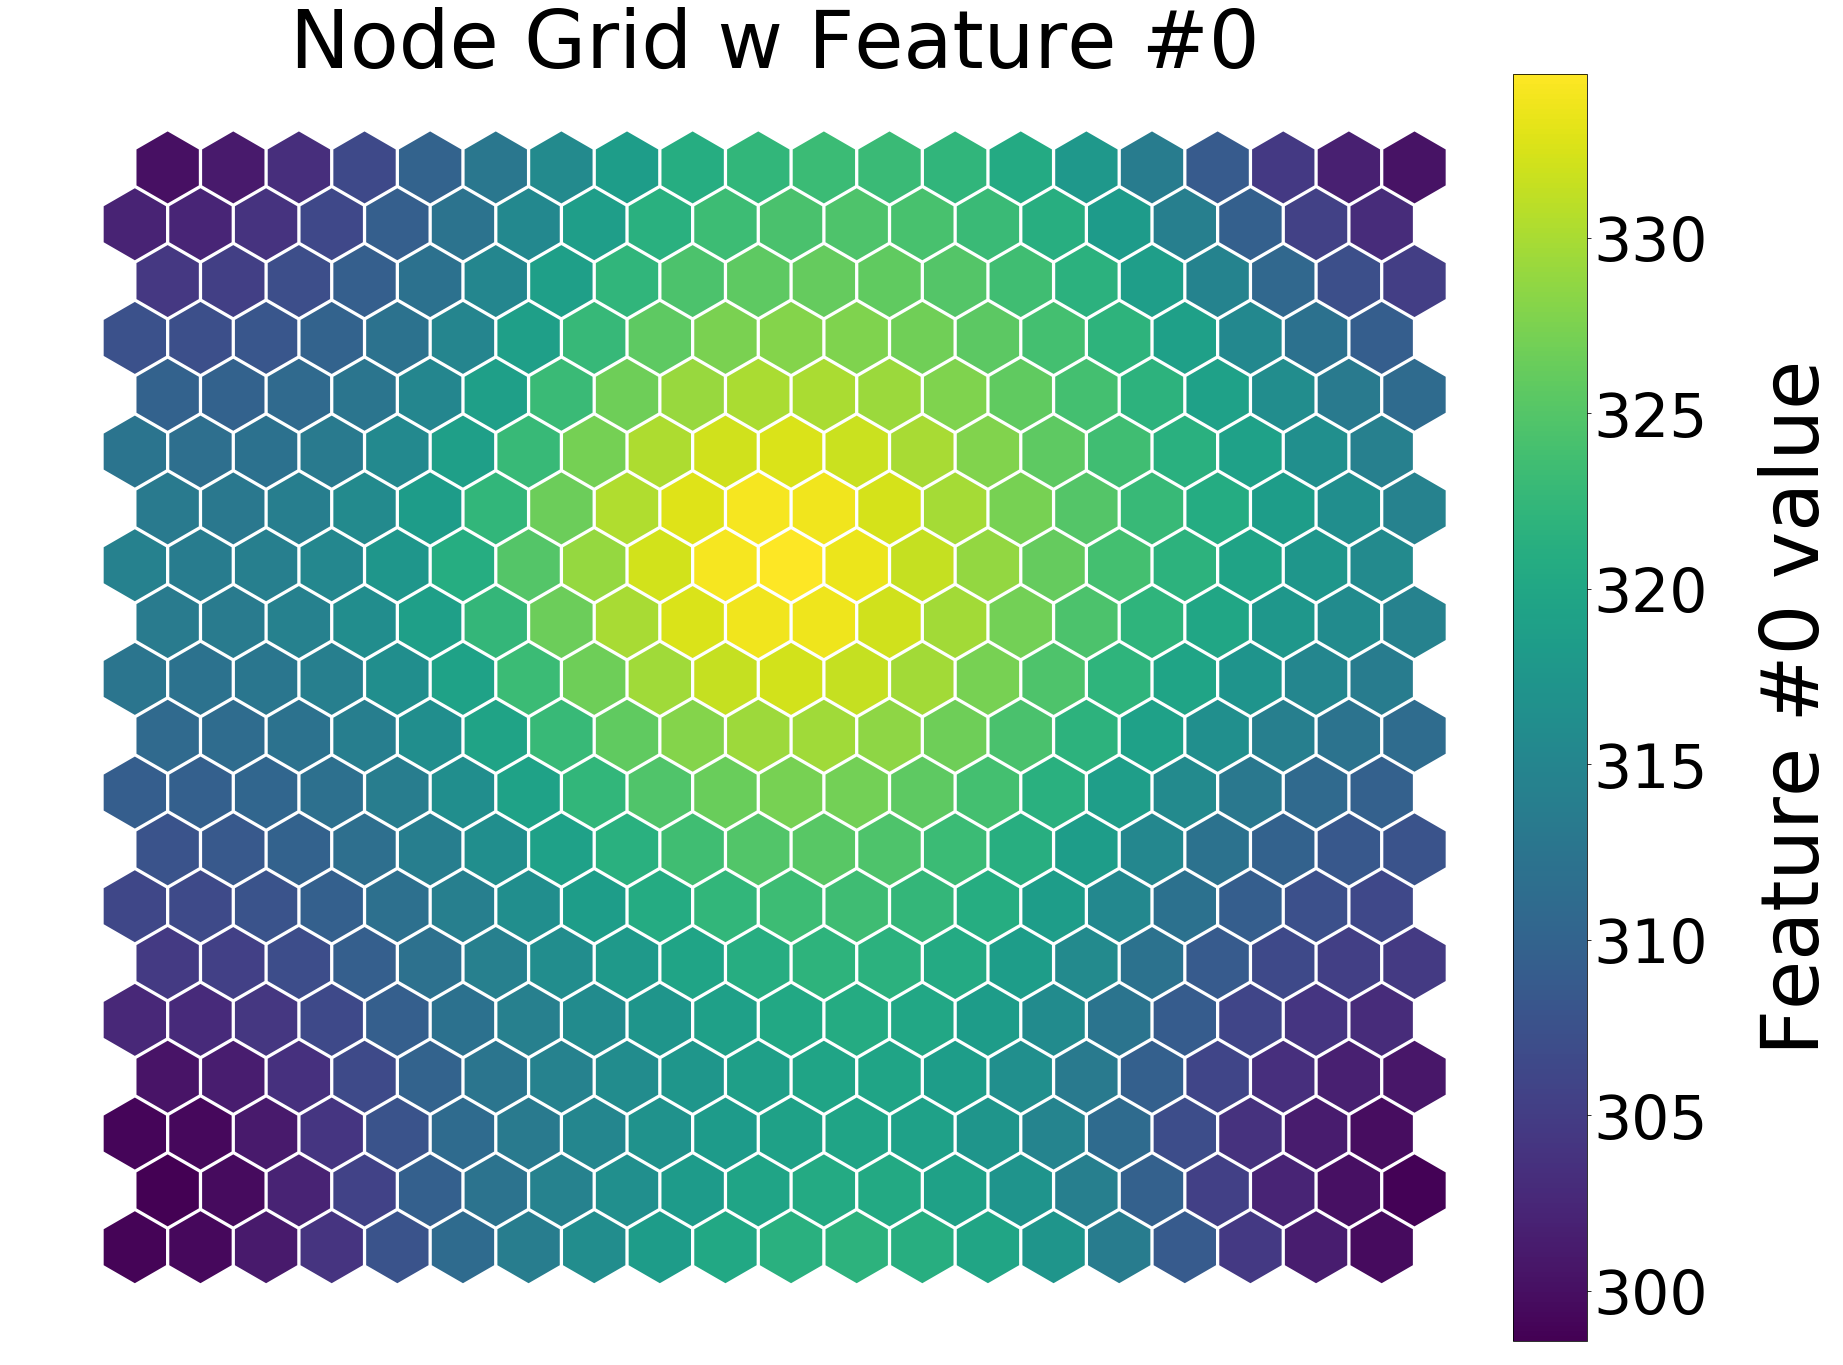

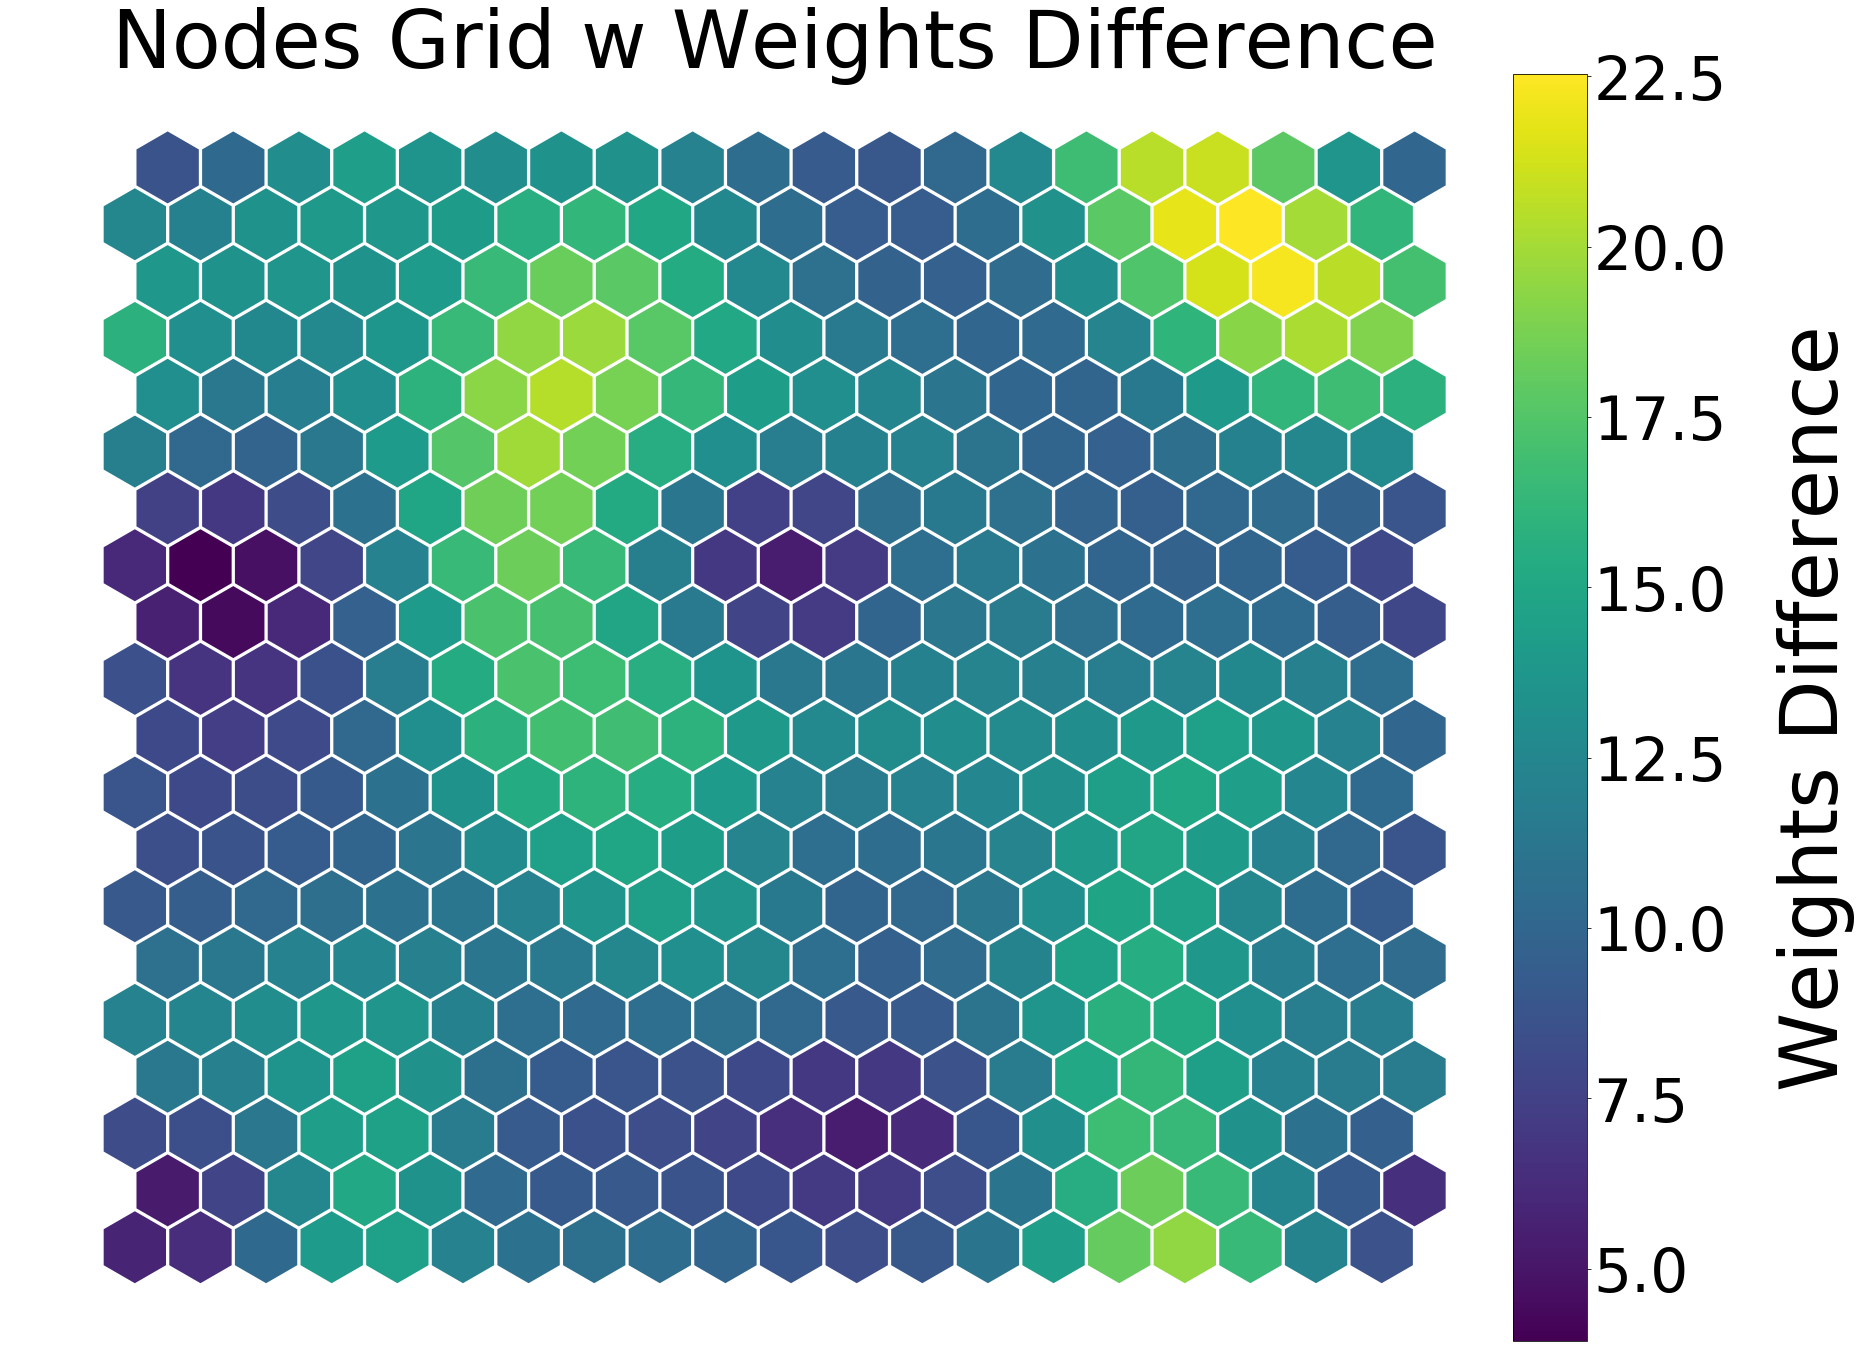

In [7]:
net.nodes_graph(colnum=0)
net.diff_graph()

In [8]:
net.project(X, labels=[4])

[[10, 10.392304845413264],
 [10, 15.588457268119896],
 [7, 3.4641016151377553],
 [11.5, 4.330127018922194],
 [6, 3.4641016151377553],
 [12.5, 11.258330249197702],
 [5, 10.392304845413264],
 [4, 1.7320508075688776],
 [1, 3.4641016151377553],
 [7, 13.856406460551021],
 [10, 15.588457268119896],
 [12, 13.856406460551021],
 [12.5, 12.99038105676658],
 [18, 5.196152422706632],
 [2.5, 12.99038105676658],
 [5, 5.196152422706632],
 [13.5, 0.8660254037844388],
 [12, 1.7320508075688776],
 [14, 5.196152422706632],
 [19, 15.588457268119896],
 [1, 8.660254037844387],
 [12, 6.9282032302755105],
 [13, 10.392304845413264],
 [10.5, 9.526279441628825],
 [10, 10.392304845413264],
 [10, 10.392304845413264],
 [14.5, 14.722431864335457],
 [0.5, 0.8660254037844388],
 [0.5, 0.8660254037844388],
 [4.5, 0.8660254037844388],
 [1, 0.0],
 [9, 15.588457268119896],
 [10, 10.392304845413264],
 [10, 10.392304845413264],
 [9.5, 12.99038105676658],
 [16.5, 12.99038105676658],
 [18.5, 2.598076211353316],
 [18.5, 2.598076

<Figure size 2000x2000 with 0 Axes>

In [9]:
net.cluster(X, type='qthresh')

[[2,
  4,
  7,
  8,
  13,
  15,
  27,
  28,
  29,
  30,
  36,
  37,
  38,
  39,
  41,
  50,
  51,
  57,
  58,
  59,
  60,
  62,
  77,
  78,
  79,
  80,
  87,
  91,
  92,
  93,
  94,
  95,
  96,
  101,
  110,
  112,
  116,
  117,
  118,
  122,
  123,
  124,
  125,
  131,
  146,
  149,
  156,
  157,
  158,
  159,
  160,
  161,
  167,
  168,
  169,
  170,
  180,
  181,
  182,
  184,
  195,
  196,
  197,
  204,
  205,
  208,
  209,
  224,
  225,
  226,
  232,
  238,
  239,
  240,
  246,
  255,
  256,
  265,
  266,
  269,
  270,
  271,
  272,
  273,
  290,
  291,
  292,
  293,
  296,
  299,
  300,
  304,
  313,
  314,
  315,
  316,
  317,
  323,
  326,
  327,
  329,
  331,
  332,
  342,
  343,
  344,
  346,
  347,
  348,
  349,
  352,
  353,
  354,
  355,
  357,
  358,
  363,
  367,
  368,
  369,
  370,
  374,
  375,
  376,
  377,
  378,
  379,
  383,
  387,
  388,
  390],
 [0,
  5,
  11,
  12,
  18,
  21,
  22,
  23,
  24,
  25,
  32,
  33,
  34,
  43,
  44,
  46,
  47,
  52,
  53,
  64,
 

<Figure size 432x288 with 0 Axes>